In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df= pd.read_csv('IMDB-Movie-Data.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [4]:
df.nunique()

Rank                  1000
Title                  999
Genre                  207
Description           1000
Director               644
Actors                 996
Year                    11
Runtime (Minutes)       94
Rating                  55
Votes                  997
Revenue (Millions)     814
Metascore               84
dtype: int64

In [5]:
df.shape

(1000, 12)

In [6]:
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

<Axes: >

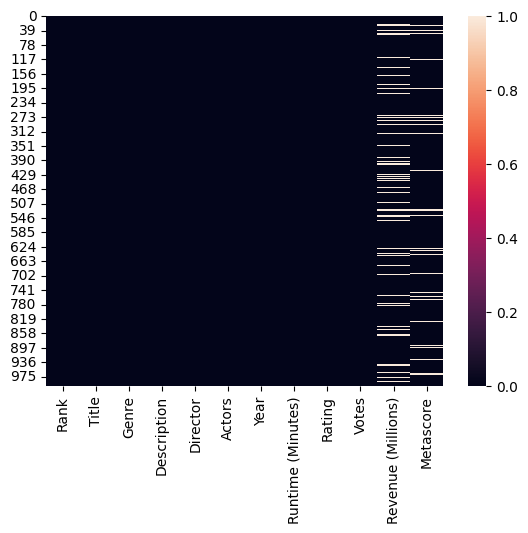

In [7]:
sns.heatmap(df.isnull())

In [8]:
df[df.duplicated()]

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore


In [9]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


# <span style= 'color: Red'>Display Title of The Movies Having Runtime >= 180 </span>

In [10]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [11]:
df[df['Runtime (Minutes)'] >= 180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object

# <span style= 'color: Red'>In Which Year There Was The Highest Average Voting? </span>

In [12]:
year_df = df.groupby('Year', as_index= False)['Votes'].mean().sort_values('Votes', ascending= False)
year_df = year_df.reset_index().drop(columns= 'index')
year_df

,Year,Votes
0,2012,285226.093750
1,2008,275505.384615
2,2006,269289.954545
3,2009,255780.647059
4,2010,252782.316667
5,2007,244331.037736
6,2011,240790.301587
7,2013,219049.648352
8,2014,203930.224490
9,2015,115726.220472


C:\Users\Aabesh\AppData\Local\Temp\ipykernel_7056\4039516130.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= year_df, x= 'Year', y= 'Votes', palette= 'hls')


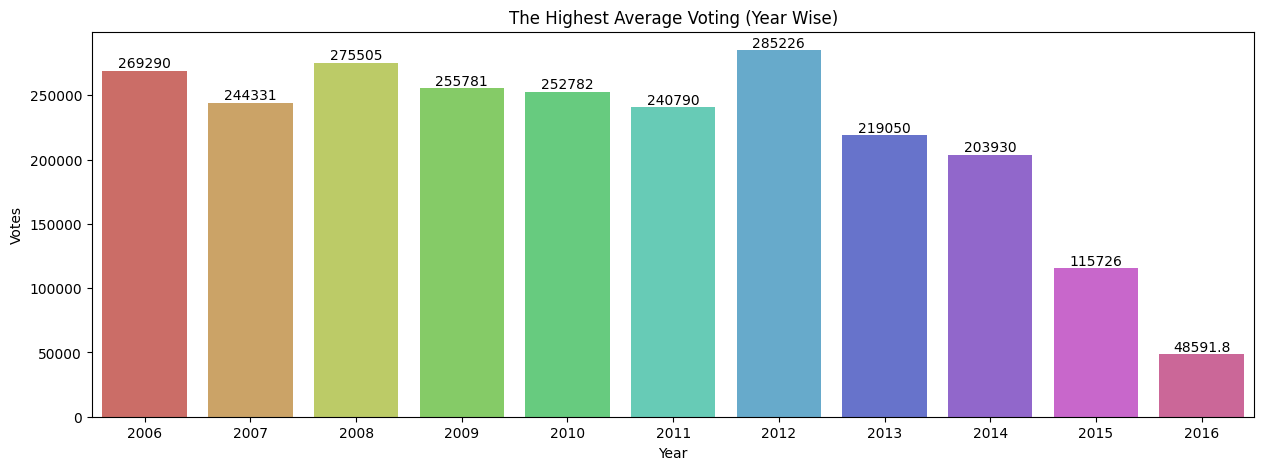

In [13]:
plt.figure(figsize= (15,5))
plt.title('The Highest Average Voting (Year Wise)')
ax= sns.barplot(data= year_df, x= 'Year', y= 'Votes', palette= 'hls')
for bars in ax.containers:
    ax.bar_label(bars)

# ***<span style= 'color: Orange'>From the bar chart, the highest average votes were giving in 2012 </span>***

# <span style= 'color: Red'>In Which Year There Was The Highest Average Revenue? </span>

In [14]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [15]:
year_df_rev = df.groupby('Year', as_index= False)['Revenue (Millions)'].mean().sort_values('Revenue (Millions)', ascending= False)
year_df = year_df.reset_index().drop(columns= 'index')
year_df

,Year,Votes
0,2012,285226.093750
1,2008,275505.384615
2,2006,269289.954545
3,2009,255780.647059
4,2010,252782.316667
5,2007,244331.037736
6,2011,240790.301587
7,2013,219049.648352
8,2014,203930.224490
9,2015,115726.220472


C:\Users\Aabesh\AppData\Local\Temp\ipykernel_7056\1870194171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= year_df_rev, x= 'Year', y= 'Revenue (Millions)', palette= 'hls')


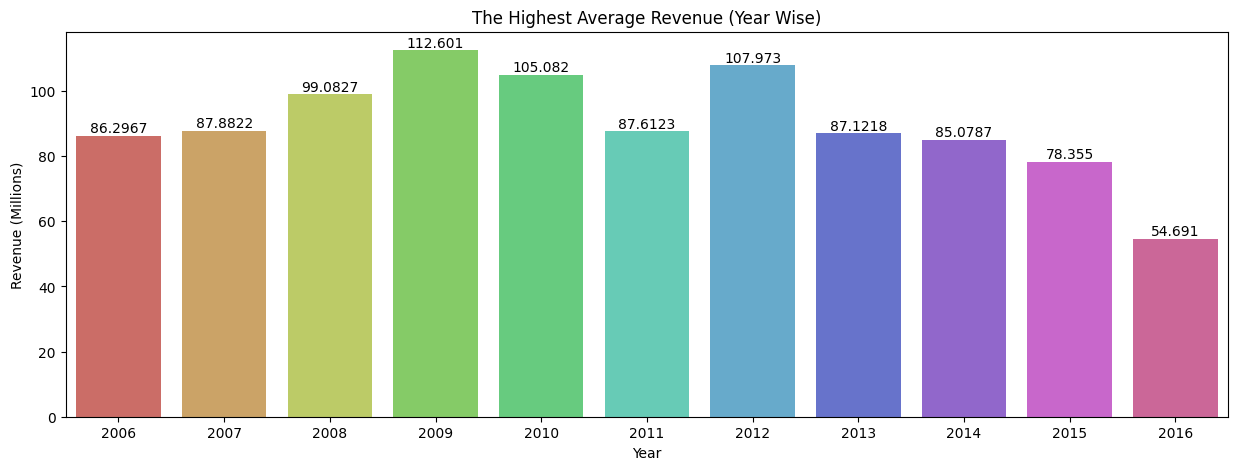

In [16]:
plt.figure(figsize= (15,5))
plt.title('The Highest Average Revenue (Year Wise)')
ax= sns.barplot(data= year_df_rev, x= 'Year', y= 'Revenue (Millions)', palette= 'hls')
for bars in ax.containers:
    ax.bar_label(bars)

# ***<span style= 'color: Orange'>From the bar chart, the highest average revenue were in 2009 </span>***

# <span style= 'color: Red'>Find The Average Rating for Each Directors </span>

In [17]:
df.nunique()

Rank                  1000
Title                  999
Genre                  207
Description           1000
Director               644
Actors                 996
Year                    11
Runtime (Minutes)       94
Rating                  55
Votes                  997
Revenue (Millions)     814
Metascore               84
dtype: int64

In [18]:
dir_df = df.groupby('Director', as_index= False)['Rating'].mean().sort_values('Rating', ascending= False)
dir_df = dir_df.reset_index().drop(columns= 'index')
dir_df.head(10)

,Director,Rating
0,Nitesh Tiwari,8.80
1,Christopher Nolan,8.68
2,Olivier Nakache,8.60
3,Makoto Shinkai,8.60
4,Aamir Khan,8.50
5,Florian Henckel von Donnersmarck,8.50
6,Naoko Yamada,8.40
7,Damien Chazelle,8.40
8,Lee Unkrich,8.30
9,Amber Tamblyn,8.30


# <span style= 'color: Red'>Display Top 10 Lengthy Movies Title and Runtime. </span>

In [19]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [31]:
top_10 = df.nlargest(n=10,columns= 'Runtime (Minutes)')[['Title','Runtime (Minutes)']]
top_10

,Title,Runtime (Minutes)
828,Grindhouse,191
88,The Hateful Eight,187
82,The Wolf of Wall Street,180
311,La vie d'Adèle,180
965,Inland Empire,180
267,Cloud Atlas,172
430,3 Idiots,170
36,Interstellar,169
75,Pirates of the Caribbean: At World's End,169
271,The Hobbit: An Unexpected Journey,169


C:\Users\Aabesh\AppData\Local\Temp\ipykernel_7056\3780098635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= top_10, x= 'Runtime (Minutes)', y= 'Title', palette= 'hls')


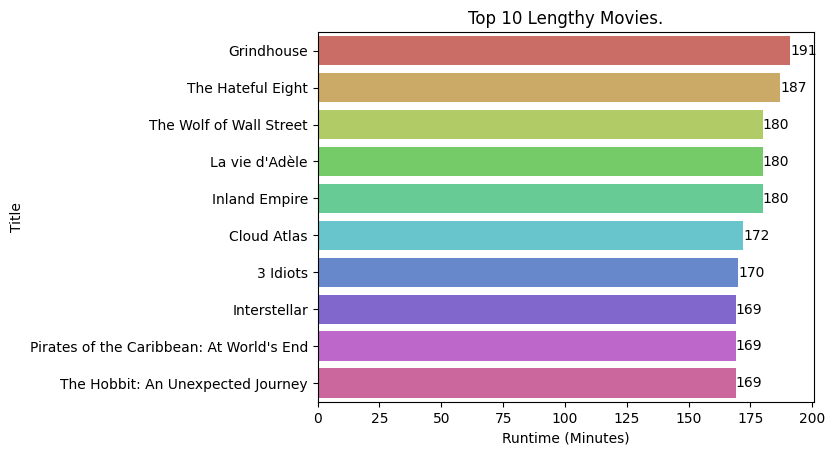

In [33]:
plt.title('Top 10 Lengthy Movies.')
ax= sns.barplot(data= top_10, x= 'Runtime (Minutes)', y= 'Title', palette= 'hls')
for bars in ax.containers:
    ax.bar_label(bars)

# <span style= 'color: Red'>Display Number of Movies Per Year. </span>

In [34]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [36]:
movies_yearly = df['Year'].value_counts()
movies_yearly

Year
2016    297
2015    127
2014     98
2013     91
2012     64
2011     63
2010     60
2007     53
2008     52
2009     51
2006     44
Name: count, dtype: int64

C:\Users\Aabesh\AppData\Local\Temp\ipykernel_7056\4233408366.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.countplot(data= df,x= 'Year', palette='hls' )


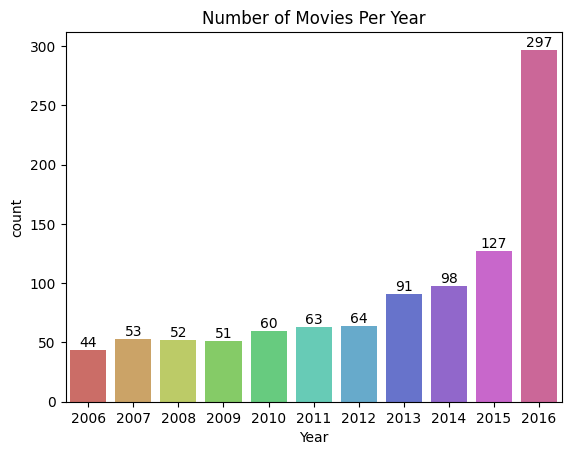

In [40]:
ax= sns.countplot(data= df,x= 'Year', palette='hls' )
plt.title('Number of Movies Per Year')
for bars in ax.containers: 
    ax.bar_label(bars)

# ***<span style= 'color: Orange'>From the bar chart, we can say that the most movies were made in 2016. </span>***

# <span style= 'color: Red'>Most Popular Movie Title (Highest Revenue)</span>

In [41]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [44]:
df[df['Revenue (Millions)'].max() == df['Revenue (Millions)']]['Title']

50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object

# ***<span style= 'color: Orange'>Most Popular Movie Title:- Star Wars: Episode VII - The Force Awakens</span>***

# <span style= 'color: Red'>Display Top 10 Highes Rated Movie Title and Its Director Name</span>

In [45]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [46]:
top_10_rated = df.nlargest(n=10, columns='Rating')[['Title', 'Director', 'Rating']]
top_10_rated

,Title,Director,Rating
54,The Dark Knight,Christopher Nolan,9.0
80,Inception,Christopher Nolan,8.8
117,Dangal,Nitesh Tiwari,8.8
36,Interstellar,Christopher Nolan,8.6
96,Kimi no na wa,Makoto Shinkai,8.6
249,The Intouchables,Olivier Nakache,8.6
64,The Prestige,Christopher Nolan,8.5
99,The Departed,Martin Scorsese,8.5
124,The Dark Knight Rises,Christopher Nolan,8.5
133,Whiplash,Damien Chazelle,8.5


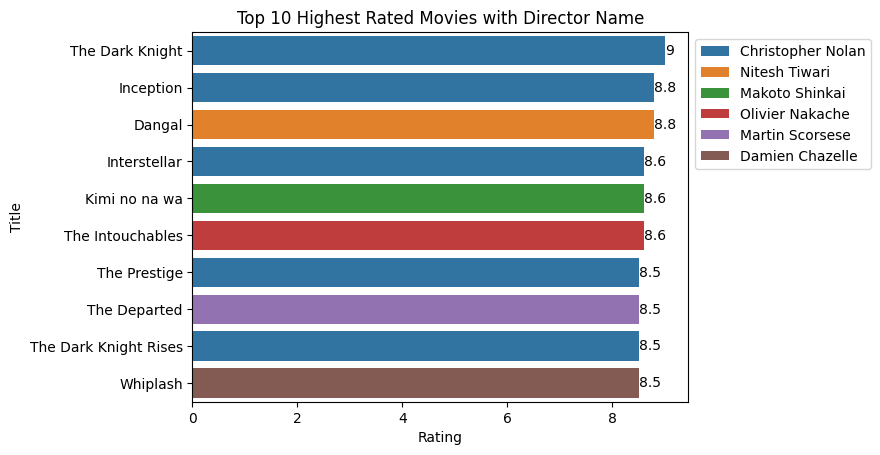

In [76]:
# plt.figure(figsize= (10,5))
plt.title('Top 10 Highest Rated Movies with Director Name')
ax= sns.barplot(data= top_10_rated, x= 'Rating', y= 'Title', hue= 'Director')
plt.legend(bbox_to_anchor= (1,1), loc=2)
for bars in ax.containers: 
    ax.bar_label(bars)

# ***<span style= 'color: Orange'>We can see that the highest rated director is 'Christopher Nolan'. Five of his movies were made in the top 10</span>***

# <span style= 'color: Red'>Display Top 10 Highest Revenue Movie Title</span>

In [56]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [58]:
top_10_revenue = df.nlargest(n=10, columns='Revenue (Millions)')[['Title','Revenue (Millions)']]
top_10_revenue

,Title,Revenue (Millions)
50,Star Wars: Episode VII - The Force Awakens,936.63
87,Avatar,760.51
85,Jurassic World,652.18
76,The Avengers,623.28
54,The Dark Knight,533.32
12,Rogue One,532.17
119,Finding Dory,486.29
94,Avengers: Age of Ultron,458.99
124,The Dark Knight Rises,448.13
578,The Hunger Games: Catching Fire,424.65


C:\Users\Aabesh\AppData\Local\Temp\ipykernel_7056\1508556399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= top_10_revenue, x= 'Revenue (Millions)', y= 'Title', palette= 'hls')


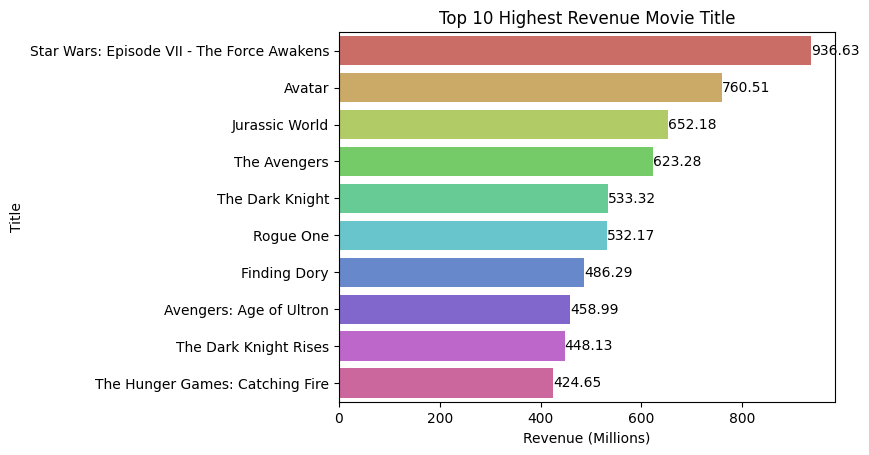

In [78]:
plt.title('Top 10 Highest Revenue Movie Title')
ax= sns.barplot(data= top_10_revenue, x= 'Revenue (Millions)', y= 'Title', palette= 'hls')
for bars in ax.containers: 
    ax.bar_label(bars)

# <span style= 'color: Red'>Find Average Rating of Movies Year Wise</span>

In [79]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [88]:
year_rate = df.groupby('Year', as_index= False)['Rating'].mean().sort_values('Rating',ascending= False)
year_rate.reset_index().drop(columns= 'index')

,Year,Rating
0,2007,7.133962
1,2006,7.125000
2,2009,6.960784
3,2012,6.925000
4,2011,6.838095
5,2014,6.837755
6,2010,6.826667
7,2013,6.812088
8,2008,6.784615
9,2015,6.602362


C:\Users\Aabesh\AppData\Local\Temp\ipykernel_7056\763400237.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(data= year_rate, x= 'Year', y= 'Rating', palette= 'hls')


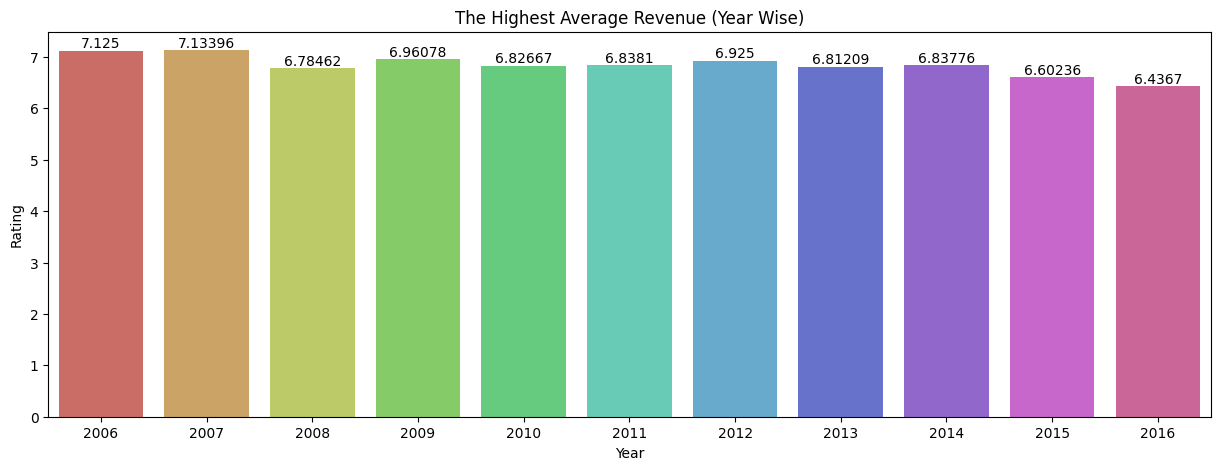

In [89]:
plt.figure(figsize= (15,5))
plt.title('The Highest Average Revenue (Year Wise)')
ax= sns.barplot(data= year_rate, x= 'Year', y= 'Rating', palette= 'hls')
for bars in ax.containers:
    ax.bar_label(bars)

# <span style= 'color: Red'>Does Rating Effects The Revenue? </span>

In [90]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

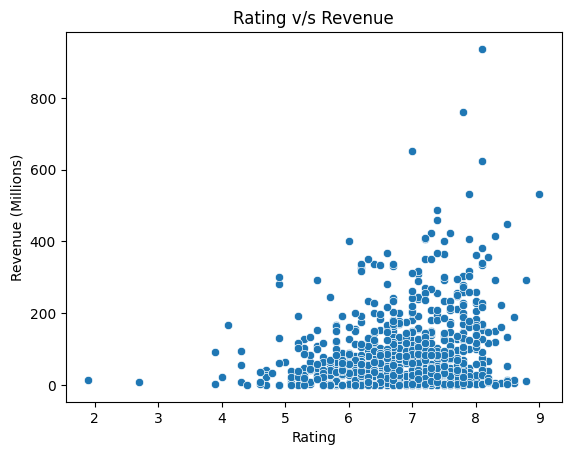

In [94]:
sns.scatterplot(data= df, x= 'Rating', y= 'Revenue (Millions)')
plt.title('Rating v/s Revenue')
plt.show()

# ***<span style= 'color: Orange'>Yes, rating effects the revenue.</span>***

# <span style= 'color: Red'>Classify Movies Based on Rating (Excellent, Good and Average) </span>

In [97]:
def rating(rate):
    if rate >=7.0:
        return 'Excellent'
    elif rate >= 6.0:
        return 'Good'
    else:
        return 'Average'

In [100]:
df['Rating_cat'] = df['Rating'].apply(rating)
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_cat
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0,Good
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0,Excellent
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0,Good
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0,Excellent
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0,Excellent


# <span style= 'color: Red'>Find Unique Values from Genre </span>

In [101]:
df['Genre']

0       Action,Adventure,Sci-Fi
1      Adventure,Mystery,Sci-Fi
2               Horror,Thriller
3       Animation,Comedy,Family
4      Action,Adventure,Fantasy
                 ...           
995         Crime,Drama,Mystery
996                      Horror
997         Drama,Music,Romance
998            Adventure,Comedy
999       Comedy,Family,Fantasy
Name: Genre, Length: 1000, dtype: object

In [103]:
list1= []

for value in df['Genre']:
    list1.append(value.split(','))


In [107]:
one_d= []

for item in list1:
    for item1 in item:
        one_d.append(item1)


In [109]:
uni_list= []

for item in one_d:
    if item not in uni_list:
        uni_list.append(item)

uni_list

['Action',
 'Adventure',
 'Sci-Fi',
 'Mystery',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Fantasy',
 'Drama',
 'Music',
 'Biography',
 'Romance',
 'History',
 'Crime',
 'Western',
 'War',
 'Musical',
 'Sport']

In [116]:
len(uni_list)

20

# <span style= 'color: Red'>How Many Films of Each Genre Were Made?</span>

In [117]:
one_d= []

for item in list1:
    for item1 in item:
        one_d.append(item1)


In [118]:
from collections import Counter

Counter(one_d)

Counter({'Drama': 513,
         'Action': 303,
         'Comedy': 279,
         'Adventure': 259,
         'Thriller': 195,
         'Crime': 150,
         'Romance': 141,
         'Sci-Fi': 120,
         'Horror': 119,
         'Mystery': 106,
         'Fantasy': 101,
         'Biography': 81,
         'Family': 51,
         'Animation': 49,
         'History': 29,
         'Sport': 18,
         'Music': 16,
         'War': 13,
         'Western': 7,
         'Musical': 5})